In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

style.use('fivethirtyeight')

from PIL import Image
import urllib
import os
import math
from PIL import Image
import matplotlib.image as image
pd.options.display.max_columns = None

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warnin

In [78]:
keepers = ['GK']
defenders = ["DF",'DF,MF']
wing_backs = ['FW,DF','DF,FW']
midfielders = ['MF,DF','MF']
forwards = ['FW','MF,FW',"FW,MF"]
def position_grouping(x):
    if x in keepers:
        return "GK"
    elif x in defenders:
        return "Defender"
    elif x in wing_backs:
        return "Wing-Back"
    elif x in midfielders:
        return "Central Midfielders"
    elif x in forwards:
        return "Forwards"
    else:
        return "unidentified position"

In [80]:
def create_full_stats_db():
    # Passing columns 
    pass_ = 'https://fbref.com/en/comps/9/passing/Premier-League-Stats'
    page =requests.get(pass_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_).text.replace('<!--', '').replace('-->', '')
    pass_df = pd.read_html(html_content)
    pass_df[-1].columns = pass_df[-1].columns.droplevel(0)
    pass_stats = pass_df[-1]
    pass_prefixes = {1: 'Total - ', 2: 'Short - ', 3: 'Medium - ', 4: 'Long - '}
    pass_column_occurrences = {'Cmp': 0, 'Att': 0, 'Cmp%': 0}
    pass_new_column_names = []
    for col_name in pass_stats.columns:
        if col_name in pass_column_occurrences:
            pass_column_occurrences[col_name] += 1
            prefix = pass_prefixes[pass_column_occurrences[col_name]]
            pass_new_column_names.append(prefix + col_name)
        else:
            pass_new_column_names.append(col_name)
    pass_stats.columns = pass_new_column_names
    pass_stats = pass_stats[pass_stats['Player'] != 'Player']

    # Shooting columns 
    shot_ = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'
    page =requests.get(shot_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(shot_).text.replace('<!--', '').replace('-->', '')
    shot_df = pd.read_html(html_content)
    shot_df[-1].columns = shot_df[-1].columns.droplevel(0) # drop top header row
    shot_stats = shot_df[-1]
    shot_stats = shot_stats[shot_stats['Player'] != 'Player']    



    # Pass Type columns 
    pass_type = 'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats'
    page =requests.get(pass_type)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_type).text.replace('<!--', '').replace('-->', '')
    pass_type_df = pd.read_html(html_content)
    pass_type_df[-1].columns = pass_type_df[-1].columns.droplevel(0) # drop top header row
    pass_type_stats = pass_type_df[-1]
    pass_type_stats = pass_type_stats[pass_type_stats['Player'] != 'Player']


    # GCA columns 
    gca_ = 'https://fbref.com/en/comps/9/gca/Premier-League-Stats'
    page =requests.get(gca_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(gca_).text.replace('<!--', '').replace('-->', '')
    gca_df = pd.read_html(html_content)
    gca_df[-1].columns = gca_df[-1].columns.droplevel(0)
    gca_stats = gca_df[-1]
    gca_prefixes = {1: 'SCA - ', 2: 'GCA - '}
    gca_column_occurrences = {'PassLive': 0, 'PassDead': 0, 'TO%': 0, 'Sh': 0, 'Fld': 0, 'Def': 0}
    gca_new_column_names = []
    for col_name in gca_stats.columns:
        if col_name in gca_column_occurrences:
            gca_column_occurrences[col_name] += 1
            prefix = gca_prefixes[gca_column_occurrences[col_name]]
            gca_new_column_names.append(prefix + col_name)
        else:
            gca_new_column_names.append(col_name)
    gca_stats.columns = gca_new_column_names
    gca_stats = gca_stats[gca_stats['Player'] != 'Player']
    

    # Defense columns 
    defence_ = 'https://fbref.com/en/comps/9/defense/Premier-League-Stats'
    page =requests.get(defence_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(defence_).text.replace('<!--', '').replace('-->', '')
    defence_df = pd.read_html(html_content)
    defence_df[-1].columns = defence_df[-1].columns.droplevel(0) # drop top header row
    defence_stats = defence_df[-1]
    rename_columns = {
    'Def 3rd': 'Tackles - Def 3rd',
    'Mid 3rd': 'Tackles - Mid 3rd',
    'Att 3rd': 'Tackles - Att 3rd',
    'Blocks': 'Total Blocks',
    'Sh': 'Shots Blocked',
    'Pass': 'Passes Blocked'}
    defence_stats.rename(columns = rename_columns, inplace=True)
    defence_prefixes = {1: 'Total - ', 2: 'Dribblers- '}
    defence_column_occurrences = {'Tkl': 0}
    new_column_names = []
    for col_name in defence_stats.columns:
        if col_name in defence_column_occurrences:
            defence_column_occurrences[col_name] += 1
            prefix = defence_prefixes[defence_column_occurrences[col_name]]
            new_column_names.append(prefix + col_name)
        else:
            new_column_names.append(col_name)
    defence_stats.columns = new_column_names
    defence_stats = defence_stats[defence_stats['Player'] != 'Player']


    # possession columns 
    poss_ = 'https://fbref.com/en/comps/9/possession/Premier-League-Stats'
    page =requests.get(poss_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(poss_).text.replace('<!--', '').replace('-->', '')
    poss_df = pd.read_html(html_content)
    poss_df[-1].columns = poss_df[-1].columns.droplevel(0) # drop top header row
    poss_stats = poss_df[-1]
    rename_columns = {
    'TotDist': 'Carries - TotDist',
    'PrgDist': 'Carries - PrgDist',
    'PrgC': 'Carries - PrgC',
    '1/3': 'Carries - 1/3',
    'CPA': 'Carries - CPA',
    'Mis': 'Carries - Mis',
    'Dis': 'Carries - Dis',
    'Att': 'Take Ons - Attempted'  }
    poss_stats.rename(columns=rename_columns, inplace=True)
    poss_stats = poss_stats[poss_stats['Player'] != 'Player']


    # misc columns 
    misc_ = 'https://fbref.com/en/comps/9/misc/Premier-League-Stats'
    page =requests.get(misc_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(misc_).text.replace('<!--', '').replace('-->', '')
    misc_df = pd.read_html(html_content)
    misc_df[-1].columns = misc_df[-1].columns.droplevel(0) # drop top header row
    misc_stats = misc_df[-1]
    misc_stats = misc_stats[misc_stats['Player'] != 'Player']

    index_df = misc_stats[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s']]

    data_frames = [poss_stats, misc_stats, pass_stats ,defence_stats, shot_stats, gca_stats, pass_type_stats]
    for df in data_frames:
        if df is not None:  # Checking if the DataFrame exists
            df.drop(columns=['Matches', 'Rk'], inplace=True, errors='ignore')
            df.dropna(axis=0, how='any', inplace=True)

            index_df = pd.merge(index_df, df, on=['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s'], how='left')
    index_df["position_group"] = index_df.Pos.apply(lambda x: position_grouping(x))  

    index_df.fillna(0, inplace=True)

    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    
    def clean_non_convertible_values(value):
        try:
            return pd.to_numeric(value)
        except (ValueError, TypeError):
            return np.nan

    # Iterate through each column, converting non-numeric columns to numeric
    for col in index_df.columns:
        if col not in non_numeric_cols:
            index_df[col] = index_df[col].apply(clean_non_convertible_values)

    
    return index_df



In [81]:
def per_90fi(dataframe):
    # Replace empty strings ('') with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill NaN values with 0
    dataframe = dataframe.fillna(0)
    
    # Convert numeric columns to numeric type
    numeric_columns = [col for col in dataframe.columns if np.issubdtype(dataframe[col].dtype, np.number)]
    numeric_columns = [value for value in numeric_columns if value != "90s"]
    
    # Exclude specified columns from the normalization
    exclude_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'position_group','90s']
    
    # Identify numeric columns to divide by '90s' and exclude columns with '%' and '90' in their names
    columns_to_divide = [col for col in numeric_columns if col not in exclude_columns 
                         and '90' not in col and '%' not in col and '90s' not in col]
    
    # Create a mask to avoid division by zero or blank values
    mask = (dataframe['90s'] != 0) 
    
    # Divide each identified column by the '90s' column, handling division by zero or blank values

    for col in columns_to_divide:
        dataframe.loc[mask, col] /= dataframe.loc[mask, '90s']

    return dataframe



In [109]:
stats = create_full_stats_db()

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
player_name = "Bukayo Saka"  

In [111]:
player_row = stats.loc[stats['Player'] == player_name]
if not player_row.empty:
    position = player_row['position_group'].values[0]
    print(f"The position of {player_name} is {position}.")
else:
    print(f"Player {player_name} not found in the dataset.")


The position of Bukayo Saka is Forwards.


In [112]:
def key_stats_db(df,position):
    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Total Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    df.dropna(axis=0, how='any', inplace=True)
    key_stats_df = df[df['position_group'] == position]
    key_stats_df = key_stats_df[non_numeric_cols + core_stats]
    key_stats_df = key_stats_df[key_stats_df['90s'] > 5]
    key_stats_df = per_90fi(key_stats_df)
    return key_stats_df


key_stats_df = key_stats_db(stats,position)

In [113]:
def create_metrics_scores(key_stats_df):
    # Define the key_stats grouped by the metrics
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Total Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    passing_metrics = ['Total - Cmp%', 'KP', 'TB', 'Sw', 'PPA', 'PrgP']
    defending_metrics = ['Tkl%', 'Total Blocks', 'Tkl+Int', 'Clr']
    creation_metrics = ['Carries - PrgDist', 'SCA90', 'GCA90', 'CrsPA', 'xA', 'Rec', 'PrgR']
    shooting_metrics = ['xG', 'Sh', 'SoT']

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Normalize the metrics
    stats_normalized = key_stats_df.copy()  # Create a copy of the DataFrame
    stats_normalized[core_stats] = scaler.fit_transform(stats_normalized[core_stats])

    # Calculate scores for each metric grouping and scale to 0-10
    stats_normalized['Passing_Score'] = stats_normalized[passing_metrics].mean(axis=1) * 10
    stats_normalized['Defending_Score'] = stats_normalized[defending_metrics].mean(axis=1) * 10
    stats_normalized['Creation_Score'] = stats_normalized[creation_metrics].mean(axis=1) * 10
    stats_normalized['Shooting_Score'] = stats_normalized[shooting_metrics].mean(axis=1) * 10

    # Add a small offset to ensure unique scores
    stats_normalized['Passing_Score'] += stats_normalized.index * 0.001
    stats_normalized['Defending_Score'] += stats_normalized.index * 0.001
    stats_normalized['Creation_Score'] += stats_normalized.index * 0.001
    stats_normalized['Shooting_Score'] += stats_normalized.index * 0.001

    # Clip scores to ensure they are within the 0-10 range
    stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].clip(lower=0, upper=10)
    return stats_normalized

def adjust_player_rating_range(dataframe):
    # Get the 'total player rating' column
    player_ratings = dataframe[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
    
    # Define the desired range for the ratings
    min_rating = 4.5
    max_rating = 9.5
    
    # Normalize the ratings to be within the desired range (5 to 9.5) for each column
    for col in player_ratings.columns:
        normalized_ratings = min_rating + (max_rating - min_rating) * ((player_ratings[col] - player_ratings[col].min()) / (player_ratings[col].max() - player_ratings[col].min()))
        dataframe[col] = normalized_ratings
    
    return dataframe


pitch_iq_scores = create_metrics_scores(key_stats_df)
pitch_iq_scores = adjust_player_rating_range(pitch_iq_scores)

In [114]:
pitch_iq_scores

,Player,Nation,Pos,Squad,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT,Passing_Score,Defending_Score,Creation_Score,Shooting_Score
4,Simon Adingra,ci CIV,"FW,MF",Brighton,21-336,Forwards,0.370787,0.765333,0.195531,0.247899,0.119048,0.400433,0.127002,0.476,0.394558,0.783340,0.402778,0.440969,0.142512,0.375000,0.437500,0.189805,0.302003,0.433380,0.097473,0.096564,0.232042,6.202565,8.073266,6.239125,5.102574
15,Miguel Almirón,py PAR,FW,Newcastle Utd,29-296,Forwards,0.584270,0.824000,0.207734,0.067390,0.000000,0.326567,0.343465,0.467,0.603329,0.509003,0.234628,0.587826,0.330918,0.302083,0.000000,0.116357,0.476772,0.448384,0.095896,0.268781,0.165584,6.112126,7.501271,6.189199,5.304723
17,Julián Álvarez,ar ARG,"MF,FW",Manchester City,23-306,Forwards,0.764045,0.690667,0.704662,0.466634,0.084034,0.593583,0.426560,0.182,0.348139,0.158026,0.121849,0.412714,0.712560,0.697917,0.308824,0.610201,0.518960,0.255469,0.221703,0.517148,0.422777,7.475356,5.093569,7.415384,6.493320
18,Zeki Amdouni,ch SUI,"FW,MF",Burnley,22-364,Forwards,0.528090,0.776000,0.159617,0.212485,0.102041,0.102968,0.157569,0.417,0.465015,0.458848,0.246599,0.361491,0.304348,0.312500,0.000000,0.125061,0.208450,0.085287,0.143889,0.361665,0.437915,5.820094,6.960522,5.346383,6.083571
23,Michail Antonio,jm JAM,FW,West Ham,33-250,Forwards,0.438202,0.218667,0.145251,0.154248,0.222222,0.149495,0.046168,0.750,0.414286,0.220023,0.053704,0.337809,0.222222,0.572917,0.136111,0.336226,0.112701,0.167276,0.129964,0.052900,0.095938,5.169725,6.606621,5.826451,4.836298
24,Antony,br BRA,"FW,MF",Manchester Utd,23-282,Forwards,0.078652,0.674667,0.412252,0.000000,0.000000,0.695925,0.491489,0.385,1.000000,0.579693,0.166667,0.724252,0.620773,0.000000,0.211207,0.349690,0.489885,0.776335,0.086269,0.495560,0.132656,6.693033,8.271722,7.083765,5.656288
25,Cameron Archer,eng ENG,FW,Sheffield Utd,22-135,Forwards,0.483146,0.869333,0.265066,0.000000,0.106383,0.107350,0.015009,0.000,0.440729,0.128005,0.154255,0.087370,0.178744,0.000000,0.000000,0.070384,0.067809,0.166899,0.007604,0.091919,0.086399,5.657010,4.892379,4.544653,4.662738
29,Taiwo Awoniyi,ng NGA,FW,Nott'ham Forest,26-113,Forwards,0.258427,0.530667,0.311037,0.093800,0.000000,0.045455,0.074955,0.000,0.167954,0.137514,0.522523,0.094648,0.396135,0.708333,0.000000,0.104063,0.064266,0.050803,0.409211,0.195397,0.212568,5.310193,5.148236,5.374518,5.852249
30,Jordan Ayew,gh GHA,"FW,MF",Crystal Palace,32-083,Forwards,0.741573,0.650667,0.201977,0.059326,0.000000,0.172494,0.220271,0.231,0.460317,0.683163,0.247863,0.440171,0.379227,0.625000,0.314103,0.271150,0.462129,0.366039,0.076645,0.235112,0.130426,5.593972,7.055766,6.780932,5.147533
44,Saïd Benrahma,dz ALG,"FW,MF",West Ham,28-115,Forwards,0.011236,0.672000,0.524280,0.266968,0.000000,0.711538,0.373890,0.182,0.557692,0.308085,0.185897,0.615075,0.724638,0.197917,0.471154,0.396296,0.458367,0.679160,0.047487,0.440835,0.259756,7.018822,6.136341,7.459192,5.730755


## Creating Player Similarity Model 
### K Means Clustering 

In [115]:
def create_kmeans_df(df): 
    KMeans_cols = ['Player','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Total Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']

    df = df[KMeans_cols]
    player_names = df['Player'].tolist() 

    df = df.drop(['Player'], axis = 1) 

    x = df.values 
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    X_norm = pd.DataFrame(x_scaled)

    pca = PCA(n_components = 2)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))

    wcss = [] 
    for i in range(1, 11): 
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(reduced) 
        wcss.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters=6)
    kmeans = kmeans.fit(reduced)

    labels = kmeans.predict(reduced)
    clusters = kmeans.labels_.tolist()

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']
    reduced.head()

    return reduced

kmeans_df = create_kmeans_df(key_stats_df)



/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda

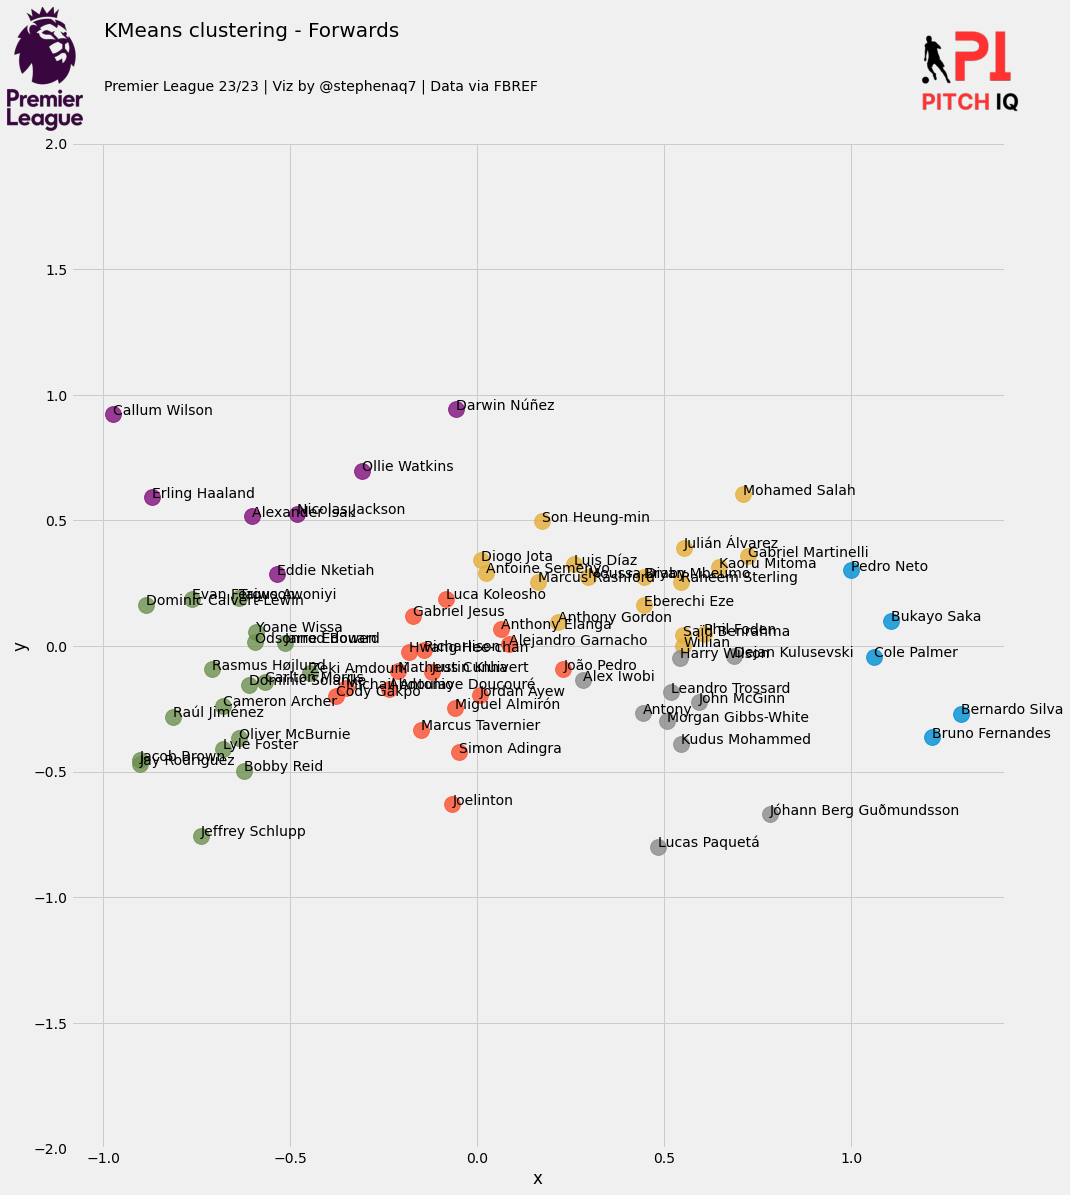

In [116]:
def creat_clustering_chart(df,position):
    # Create the scatter plot using lmplot
    ax = sns.lmplot(x="x", y="y", hue='cluster', data=df, legend=False,
                    fit_reg=False, size=15, scatter_kws={"s": 250})

    texts = []
    for x, y, s in zip(df.x, df.y, df.name):
        texts.append(plt.text(x, y, s,fontweight='light'))


    # Additional axes for logos and titles
    fig = plt.gcf()
    ax1 = plt.gca()

    # Add title and logos to the current figure
    fig.text(.1, 1.08, f'KMeans clustering - {position}', size=20, font='Karla')
    fig.text(.1, 1.03, 'Premier League 23/23 | Viz by @stephenaq7 | Data via FBREF', size=14, font='Karla')

    ax2 = fig.add_axes([0.01, 0.175, 0.07, 1.75])
    ax2.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
    ax2.imshow(img)

    ax3 = fig.add_axes([0.85, 0.175, 0.1, 1.75])
    ax3.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
    ax3.imshow(img)

    # Set axis limits and labels for the lmplot
    ax1.set(ylim=(-2, 2))
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize=20)
    plt.ylabel("PC 2", fontsize=20)

    plt.tight_layout()
    plt.show()
    
creat_clustering_chart(kmeans_df,position)

In [303]:
def find_similar_players(player_name, df, top_n=5):
    player = df[df['name'] == player_name].iloc[0]
    df['distance'] = np.sqrt((df['x'] - player['x'])**2 + (df['y'] - player['y'])**2)
    
    max_distance = df['distance'].max()  
    
    df['perc_similarity'] = ((max_distance - df['distance']) / max_distance) * 100
    
    similar_players = df.sort_values('distance').head(top_n + 1)  
    similar_players = similar_players[1:] 
    
    return similar_players


In [304]:
similairty_table = find_similar_players(player_name, kmeans_df)[['name','perc_similarity']]


In [305]:
similairty_table.rename(columns={'name': 'Player'}, inplace=True)
# Assuming 'pitchiq_scores' and 'similarity' are the DataFrames and you want to merge based on the 'Player' column
mertrics_similarity = pd.merge(similairty_table, pitch_iq_scores, on='Player', how='left')


In [306]:
mertrics_similarity

,Player,perc_similarity,Nation,Pos,Squad,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT,Passing_Score,Defending_Score,Creation_Score,Shooting_Score
0,Cole Palmer,93.299382,eng ENG,"FW,MF",Chelsea,21-211,Forwards,0.258427,0.800000,0.555639,0.844197,0.540541,1.000000,0.787418,0.444,0.279923,0.481300,0.065315,0.676749,0.748792,0.416667,0.331081,0.697661,0.760062,0.147664,0.580447,0.288330,0.144408,9.476719,6.514757,7.896143,6.399763
1,Pedro Neto,89.804570,pt POR,"MF,FW",Wolves,23-269,Forwards,0.528090,0.600000,0.713716,0.070828,0.204082,0.686456,0.292064,0.364,0.169096,0.147337,0.098639,0.784450,0.797101,0.947917,1.000000,0.722697,0.453186,0.418481,0.163781,0.244709,0.180574,7.225515,5.306363,9.189171,5.585155
2,Bernardo Silva,81.461538,pt POR,"MF,FW",Manchester City,29-115,Forwards,0.449438,1.000000,0.607158,0.076277,0.000000,0.628372,0.755745,0.588,0.500785,0.440876,0.159341,0.863555,0.830918,0.572917,0.807692,0.846821,1.000000,0.407854,0.031420,0.000000,0.093475,7.858336,7.579619,9.453826,4.764625
3,Dejan Kulusevski,80.125391,se SWE,FW,Tottenham,23-222,Forwards,0.842697,0.688000,0.590583,0.165266,0.158730,0.667388,0.340972,0.138,0.295918,0.490576,0.038360,0.713496,0.760870,0.083333,0.583333,0.503564,0.417261,0.689371,0.082001,0.278496,0.192012,7.224142,5.675464,7.797568,5.474085
4,Gabriel Martinelli,79.390325,br BRA,FW,Arsenal,22-168,Forwards,0.516854,0.746667,0.535046,0.071559,0.103093,0.589503,0.295972,0.200,0.256259,0.227891,0.049828,0.738708,0.734300,0.645833,0.378866,0.428808,0.633735,1.000000,0.065652,0.296314,0.287755,6.937771,5.153967,8.607395,5.673284


In [307]:
comparative_list = list(mertrics_similarity.Player.unique())
sim_index = list(mertrics_similarity.perc_similarity.unique())
sim_index = [round(item, 2) for item in sim_index]


In [308]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [309]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [310]:
params = ['Total - Cmp%','KP',
'PPA',
 'PrgP',
 'Tkl%',
 'Total Blocks',
 'Tkl+Int',
 'Clr',
 'Carries - PrgDist',
 'SCA90',
 'xA',
 'xG']

In [311]:
main_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][params].values.tolist()
comp_player_1 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[0]][params].values.tolist()
comp_player_2 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[1]][params].values.tolist()
comp_player_3 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[2]][params].values.tolist()
comp_player_4 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[3]][params].values.tolist()
comp_player_5 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[4]][params].values.tolist()


main_player = [val for sublist in main_player for val in sublist]
comp_player_1 = [val for sublist in comp_player_1 for val in sublist]
comp_player_2 = [val for sublist in comp_player_2 for val in sublist]
comp_player_3 = [val for sublist in comp_player_3 for val in sublist]
comp_player_4 = [val for sublist in comp_player_4 for val in sublist]




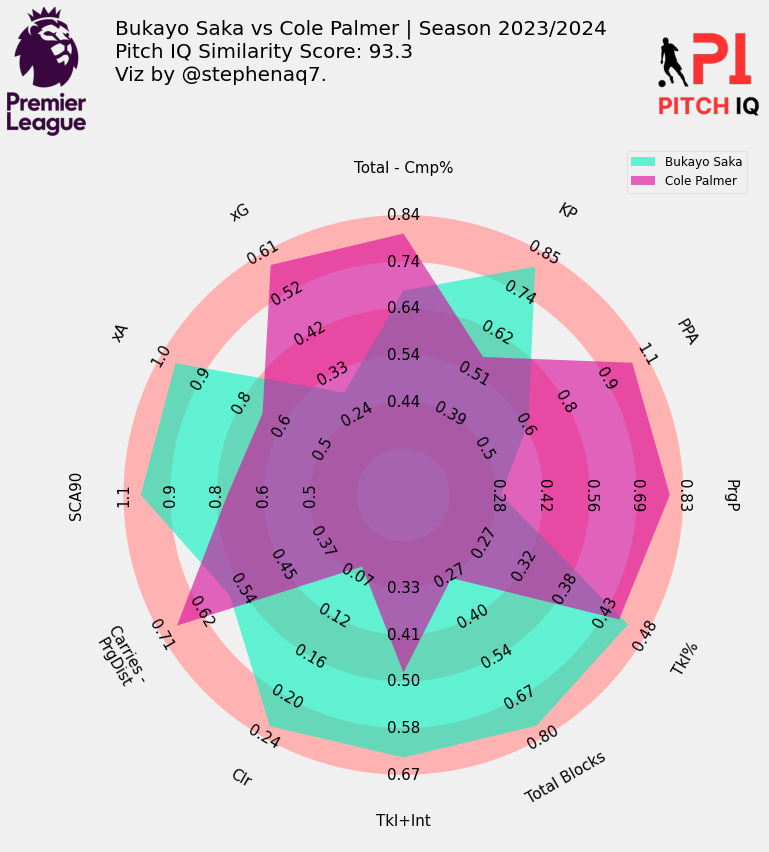

In [312]:

values = main_player
values_2 = comp_player_1

def convert_to_numeric(input_list):
    return [float(x) for x in input_list]  # Use int() instead of float() if integers are desired

# Convert string-based lists to numeric lists
numeric_values = convert_to_numeric(values)
numeric_comp_player_1 = convert_to_numeric(comp_player_1)

# Perform the calculations after converting to numeric lists
low = [min(value, value_2) * 0.5 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]
high = [max(value, value_2) * 1.05 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]

radar = Radar(params, low, high,
    
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=5,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


fig, ax = radar.setup_axis()

fig.patch.set_facecolor('#f0f0f0')  # Adjust this color to match 'fivethirtyeight' style
ax.set_facecolor('#f0f0f0')  # Adjust axis background color to match the whitespace

rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2')
radar_output = radar.draw_radar_compare(values, values_2, ax=ax,
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15)

# Adding a legend for the radar comparison
ax.legend([f'{player_name}', comparative_list[0]], loc='upper right', fontsize=12)



# # ---- The Naught Boys Image
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

fig_text(
    x = 0.75, y = 0.95, 
    s = f"{player_name} vs {comparative_list[0]} | Season 2023/2024\nPitch IQ Similarity Score: {sim_index[0]}\nViz by @stephenaq7.",
    va = "bottom", ha = "right",
    fontsize = 20, color = "black", font = "Karla", weight = "book"
)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.80, 0.09, 0.13, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)

# Show the plot
plt.show()


In [313]:
colours = ['#FF3A63',
'#7A15CC',
'#8F2ABE',
'#F630A8',
'#CB49F3']

In [314]:
def plot_compairison_radars(params,comparative_list,pitch_iq_scores,mertrics_similarity,sim_index):

    main_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][params].values.tolist()
    comp_player_1 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[0]][params].values.tolist()
    comp_player_2 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[1]][params].values.tolist()
    comp_player_3 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[2]][params].values.tolist()
    comp_player_4 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[3]][params].values.tolist()
    comp_player_5 = mertrics_similarity[mertrics_similarity['Player'] == comparative_list[4]][params].values.tolist()


    main_player = [val for sublist in main_player for val in sublist]
    comp_player_1 = [val for sublist in comp_player_1 for val in sublist]
    comp_player_2 = [val for sublist in comp_player_2 for val in sublist]
    comp_player_3 = [val for sublist in comp_player_3 for val in sublist]
    comp_player_4 = [val for sublist in comp_player_4 for val in sublist]
    comp_player_5 = [val for sublist in comp_player_5 for val in sublist]

    all_comp_players = [comp_player_1,comp_player_2,comp_player_3,comp_player_4,comp_player_5]
    counter = 0
    for comp_player  in all_comp_players:
        
        values = main_player
        values_2 = comp_player

        def convert_to_numeric(input_list):
            return [float(x) for x in input_list]  # Use int() instead of float() if integers are desired

        # Convert string-based lists to numeric lists
        numeric_values = convert_to_numeric(values)
        numeric_comp_player_1 = convert_to_numeric(comp_player)

        # Perform the calculations after converting to numeric lists
        low = [min(value, value_2) * 0.5 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]
        high = [max(value, value_2) * 1.05 for value, value_2 in zip(numeric_values, numeric_comp_player_1)]

        radar = Radar(params, low, high,
            
                    # whether to round any of the labels to integers instead of decimal places
                    round_int=[False]*len(params),
                    num_rings=5,  # the number of concentric circles (excluding center circle)
                    # if the ring_width is more than the center_circle_radius then
                    # the center circle radius will be wider than the width of the concentric circles
                    ring_width=1, center_circle_radius=1)


        fig, ax = radar.setup_axis()

        fig.patch.set_facecolor('#f0f0f0')  # Adjust this color to match 'fivethirtyeight' style
        ax.set_facecolor('#f0f0f0')  # Adjust axis background color to match the whitespace

        rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2')
        radar_output = radar.draw_radar_compare(values, values_2, ax=ax,
                                                kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                                kwargs_compare={f'facecolor': '#d80499', 'alpha': 0.6})
        radar_poly, radar_poly2, vertices1, vertices2 = radar_output
        range_labels = radar.draw_range_labels(ax=ax, fontsize=15,)
        param_labels = radar.draw_param_labels(ax=ax, fontsize=15)

        # Adding a legend for the radar comparison
        ax.legend([f'{player_name}', comparative_list[counter]], loc='upper right', fontsize=12)



        # # ---- The Naught Boys Image
        league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
        league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
        league_ax.imshow(league_icon)
        league_ax.axis("off")

        fig_text(
            x = 0.55, y = 0.90, 
            s = f"{player_name} vs {comparative_list[counter]}\nSeason 2023/2024\nPitch IQ Similarity Score: {sim_index[counter]}%\nViz by @stephenaq7.",
            va = "bottom", ha = "right",
            fontsize = 20, color = "black", font = "Karla", weight = "book"
        )


        ### Add Stats by Steve logo
        ax3 = fig.add_axes([0.80, 0.09, 0.13, 1.75])
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
        ax3.imshow(img)
        counter += 1

        # Show the plot
        plt.show()


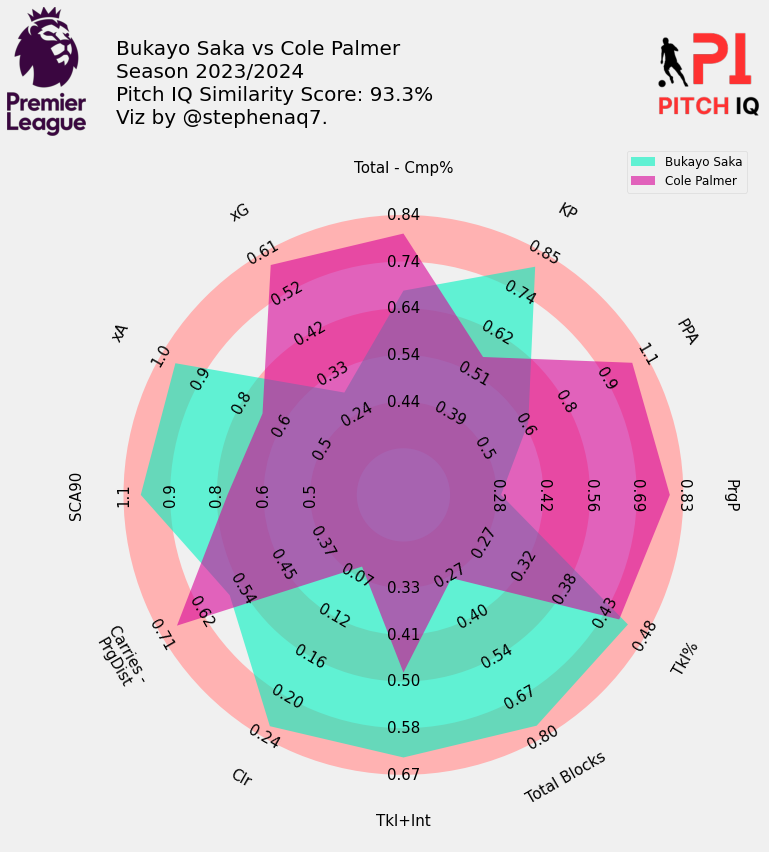

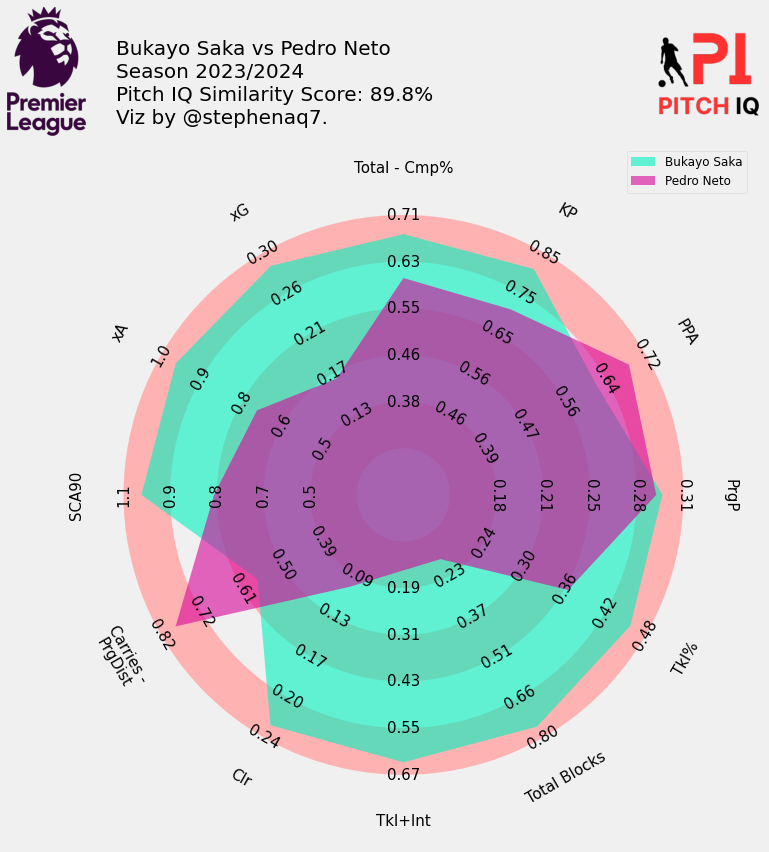

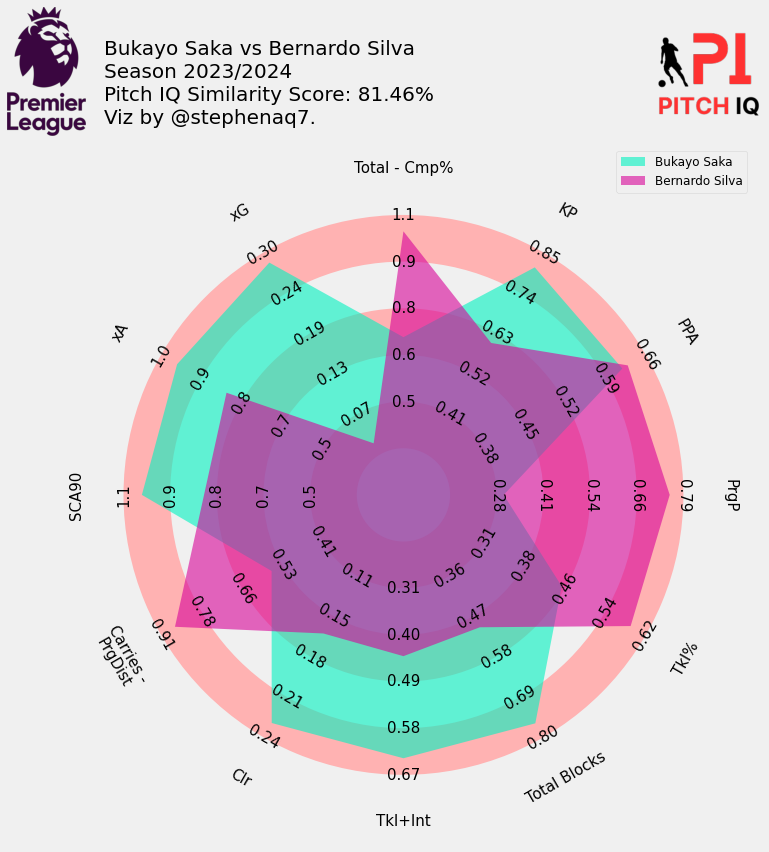

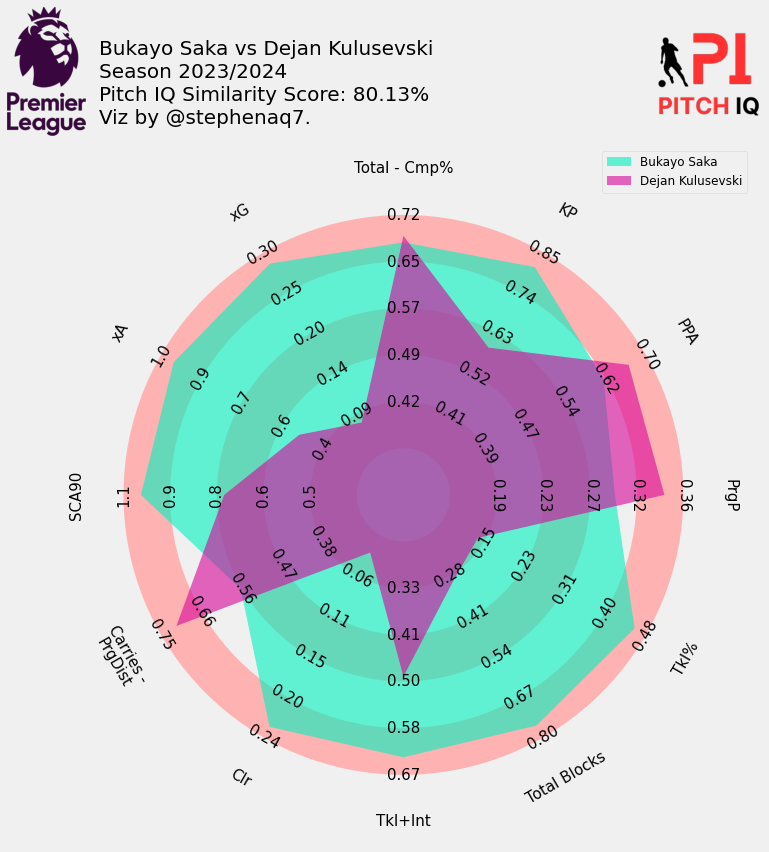

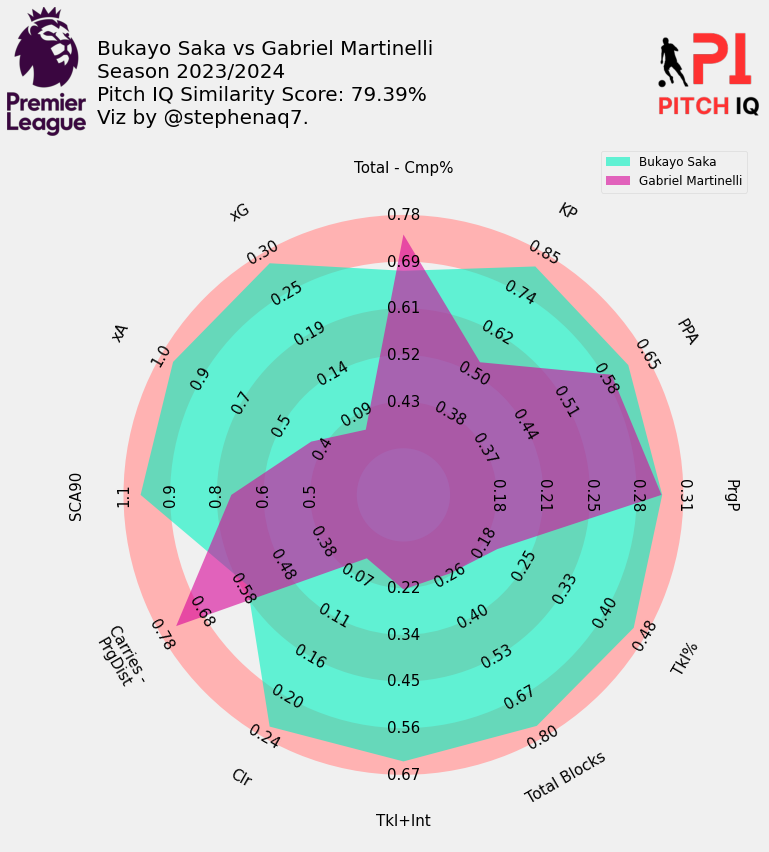

In [315]:
plot_compairison_radars(params,comparative_list,pitch_iq_scores,mertrics_similarity, sim_index)

In [316]:
mertrics_similarity

,Player,perc_similarity,Nation,Pos,Squad,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT,Passing_Score,Defending_Score,Creation_Score,Shooting_Score
0,Cole Palmer,93.299382,eng ENG,"FW,MF",Chelsea,21-211,Forwards,0.258427,0.800000,0.555639,0.844197,0.540541,1.000000,0.787418,0.444,0.279923,0.481300,0.065315,0.676749,0.748792,0.416667,0.331081,0.697661,0.760062,0.147664,0.580447,0.288330,0.144408,9.476719,6.514757,7.896143,6.399763
1,Pedro Neto,89.804570,pt POR,"MF,FW",Wolves,23-269,Forwards,0.528090,0.600000,0.713716,0.070828,0.204082,0.686456,0.292064,0.364,0.169096,0.147337,0.098639,0.784450,0.797101,0.947917,1.000000,0.722697,0.453186,0.418481,0.163781,0.244709,0.180574,7.225515,5.306363,9.189171,5.585155
2,Bernardo Silva,81.461538,pt POR,"MF,FW",Manchester City,29-115,Forwards,0.449438,1.000000,0.607158,0.076277,0.000000,0.628372,0.755745,0.588,0.500785,0.440876,0.159341,0.863555,0.830918,0.572917,0.807692,0.846821,1.000000,0.407854,0.031420,0.000000,0.093475,7.858336,7.579619,9.453826,4.764625
3,Dejan Kulusevski,80.125391,se SWE,FW,Tottenham,23-222,Forwards,0.842697,0.688000,0.590583,0.165266,0.158730,0.667388,0.340972,0.138,0.295918,0.490576,0.038360,0.713496,0.760870,0.083333,0.583333,0.503564,0.417261,0.689371,0.082001,0.278496,0.192012,7.224142,5.675464,7.797568,5.474085
4,Gabriel Martinelli,79.390325,br BRA,FW,Arsenal,22-168,Forwards,0.516854,0.746667,0.535046,0.071559,0.103093,0.589503,0.295972,0.200,0.256259,0.227891,0.049828,0.738708,0.734300,0.645833,0.378866,0.428808,0.633735,1.000000,0.065652,0.296314,0.287755,6.937771,5.153967,8.607395,5.673284


In [317]:
mertrics_similarity = mertrics_similarity.rename(columns={'Squad': 'team'})
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

mertrics_similarity = mertrics_similarity.merge(fm_ids, on='team', how='left')

mertrics_similarity

,Player,perc_similarity,Nation,Pos,team,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,team_id
0,Cole Palmer,93.299382,eng ENG,"FW,MF",Chelsea,21-211,Forwards,0.258427,0.800000,0.555639,0.844197,0.540541,1.000000,0.787418,0.444,0.279923,0.481300,0.065315,0.676749,0.748792,0.416667,0.331081,0.697661,0.760062,0.147664,0.580447,0.288330,0.144408,9.476719,6.514757,7.896143,6.399763,8455
1,Pedro Neto,89.804570,pt POR,"MF,FW",Wolves,23-269,Forwards,0.528090,0.600000,0.713716,0.070828,0.204082,0.686456,0.292064,0.364,0.169096,0.147337,0.098639,0.784450,0.797101,0.947917,1.000000,0.722697,0.453186,0.418481,0.163781,0.244709,0.180574,7.225515,5.306363,9.189171,5.585155,8602
2,Bernardo Silva,81.461538,pt POR,"MF,FW",Manchester City,29-115,Forwards,0.449438,1.000000,0.607158,0.076277,0.000000,0.628372,0.755745,0.588,0.500785,0.440876,0.159341,0.863555,0.830918,0.572917,0.807692,0.846821,1.000000,0.407854,0.031420,0.000000,0.093475,7.858336,7.579619,9.453826,4.764625,8456
3,Dejan Kulusevski,80.125391,se SWE,FW,Tottenham,23-222,Forwards,0.842697,0.688000,0.590583,0.165266,0.158730,0.667388,0.340972,0.138,0.295918,0.490576,0.038360,0.713496,0.760870,0.083333,0.583333,0.503564,0.417261,0.689371,0.082001,0.278496,0.192012,7.224142,5.675464,7.797568,5.474085,8586
4,Gabriel Martinelli,79.390325,br BRA,FW,Arsenal,22-168,Forwards,0.516854,0.746667,0.535046,0.071559,0.103093,0.589503,0.295972,0.200,0.256259,0.227891,0.049828,0.738708,0.734300,0.645833,0.378866,0.428808,0.633735,1.000000,0.065652,0.296314,0.287755,6.937771,5.153967,8.607395,5.673284,9825


In [339]:
mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = \
    mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].round(2)

# Storing the rounded values in df_final
df_final = mertrics_similarity[['Player', 'Pos','team_id','perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
metric_scores =['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']

sim_player_vals = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores].values.tolist()

sim_player_vals = [val for sublist in sim_player_vals for val in sublist]
df_final['Δ% Passing'] = ((sim_player_vals[0] - df_final['Passing_Score'] ) / df_final['Passing_Score']).round(1) *100
df_final['Δ% Defending'] = ((sim_player_vals[1] - df_final['Defending_Score']) / df_final['Passing_Score']).round(1)*100
df_final['Δ% Creation'] = ((sim_player_vals[2] - df_final['Creation_Score']) / df_final['Passing_Score']).round(1)*100
df_final['Δ% Shooting'] = ((sim_player_vals[3] - df_final['Shooting_Score']) / df_final['Passing_Score']).round(1)*100
df_final = df_final[::-1]


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [342]:
sim_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores]
sim_player

In [340]:
def perc_battery(perc_similarity, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [perc_similarity/100], fc = '#00529F', height=.35)
    text_ = ax.annotate(
        xy=((perc_similarity/100), .5),
        text=f'{(perc_similarity/100):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=8
    )
    ax.set_axis_off()
    return ax

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

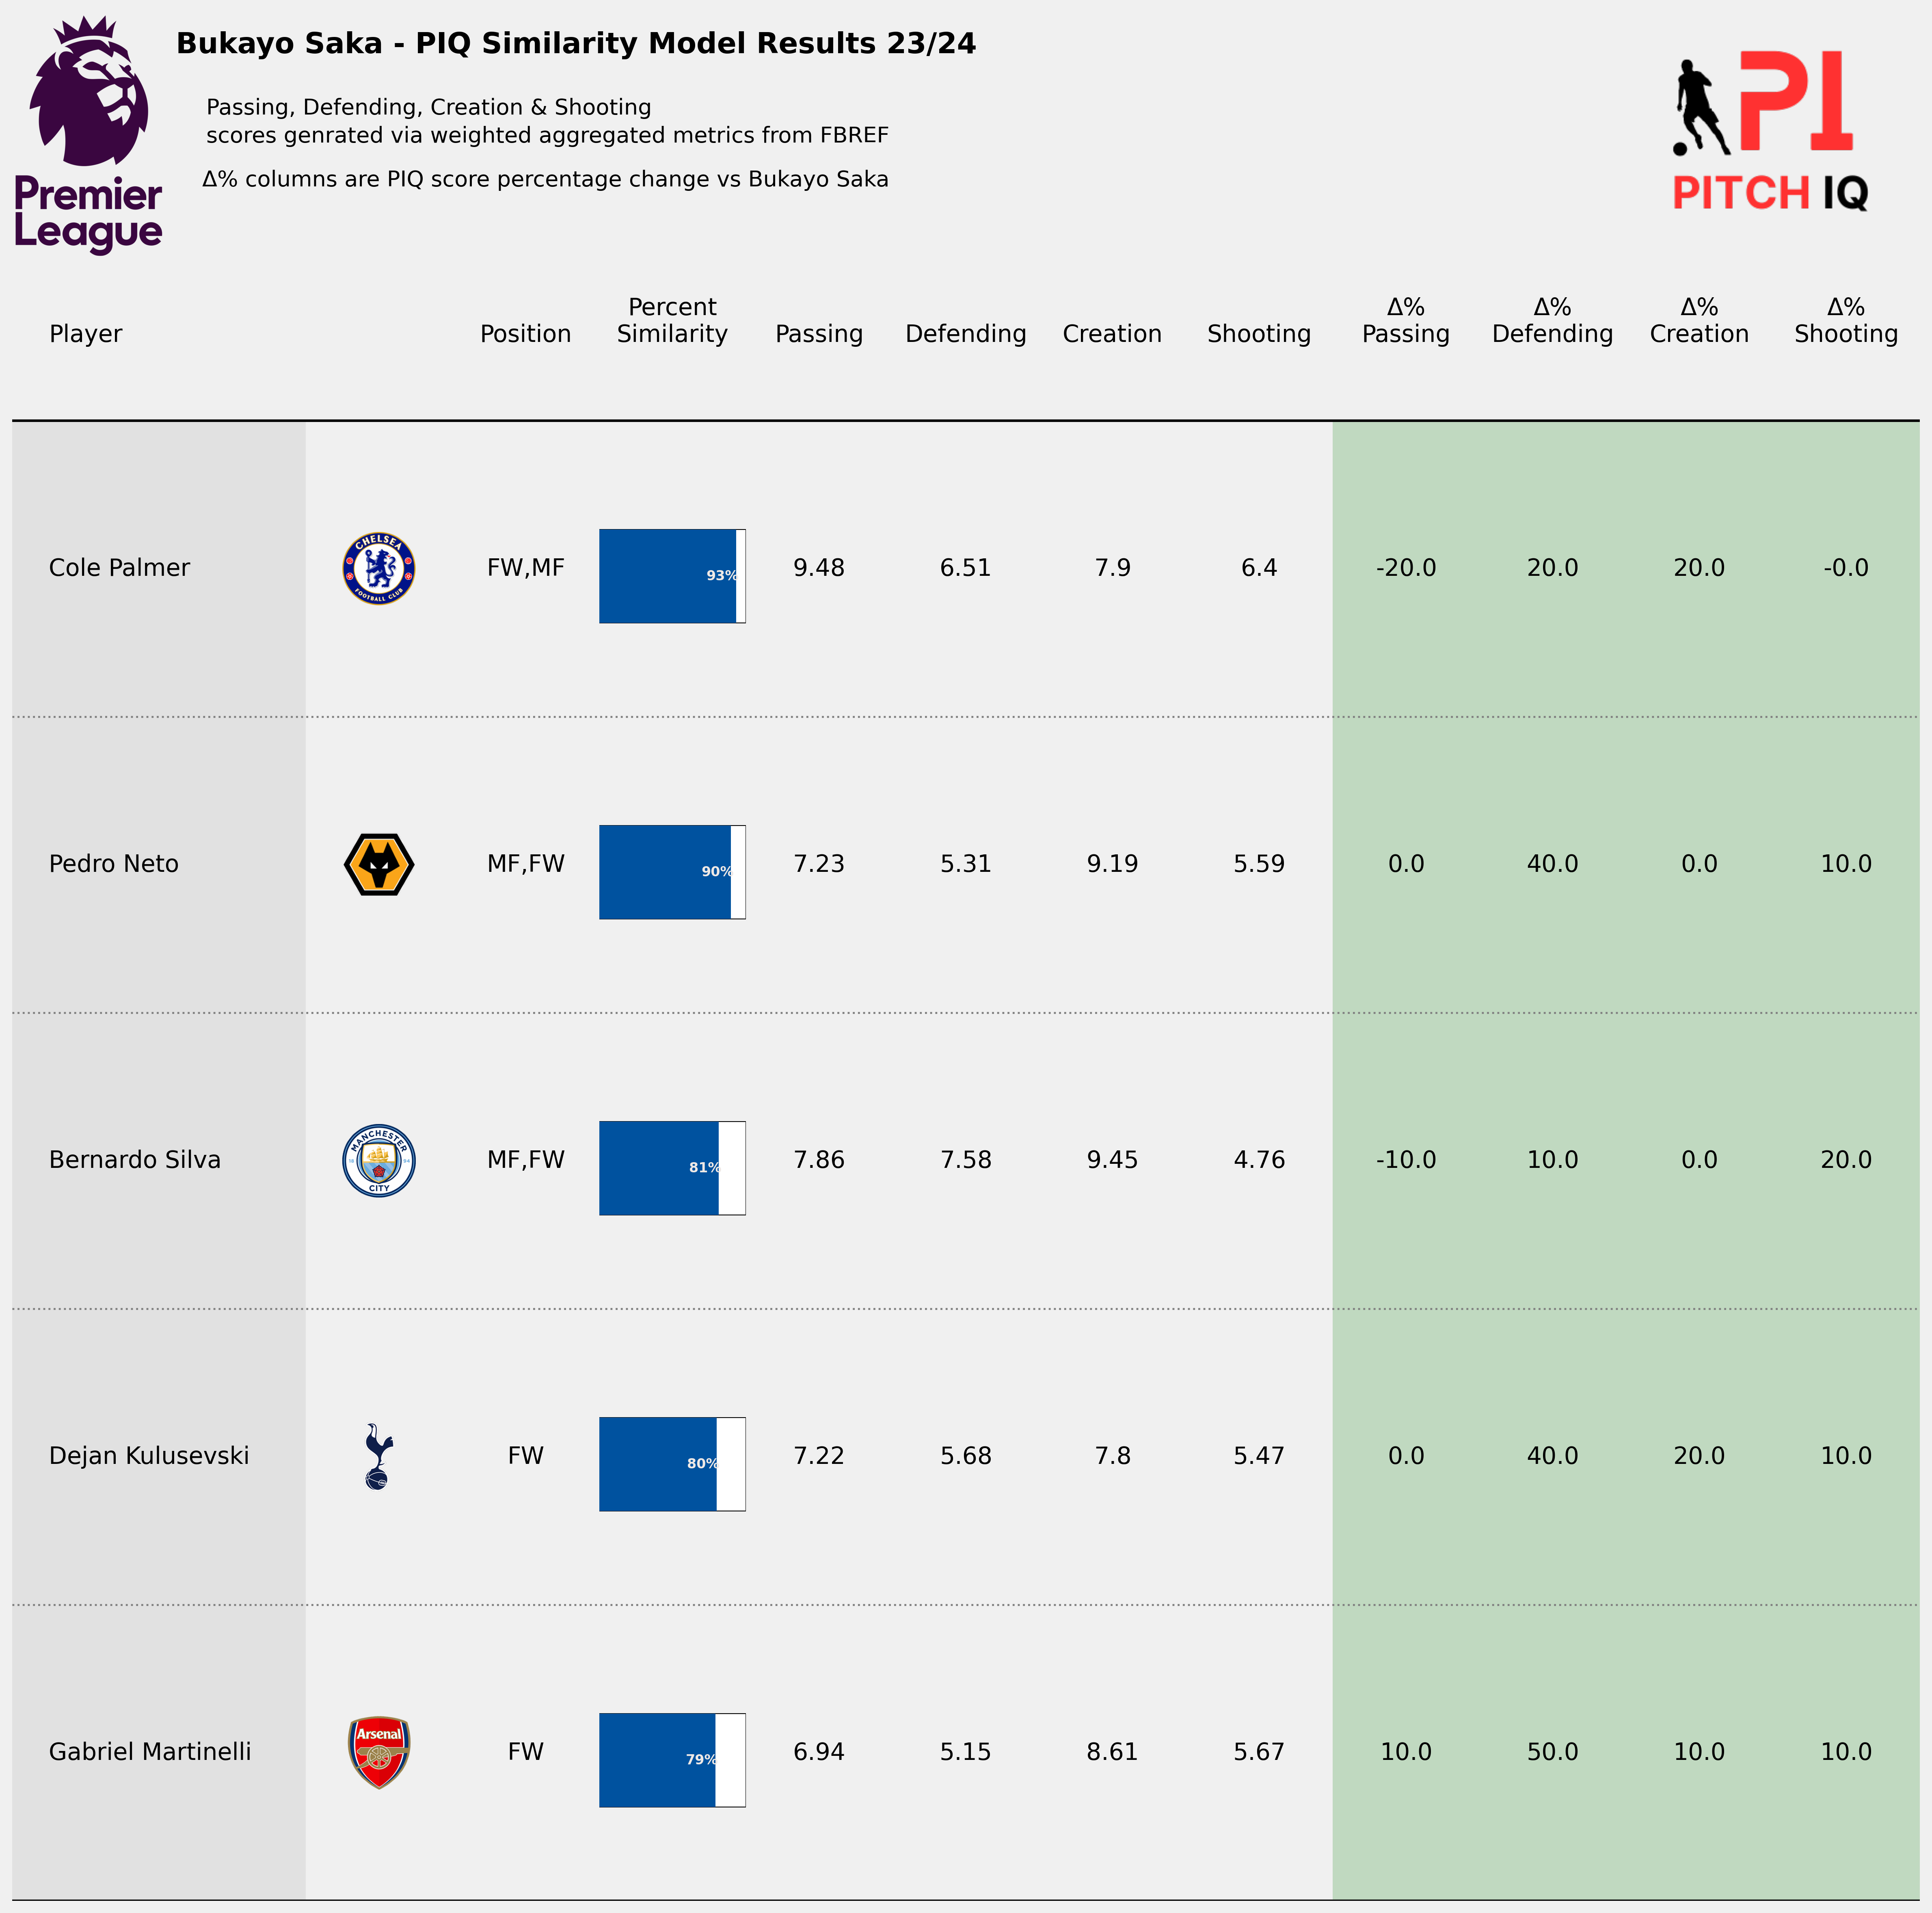

In [341]:
fig = plt.figure(figsize=(18,18), dpi=300)
ax = plt.subplot()

ncols = 12
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]
columns = ['Player', 'Pos', 'perc_similarity', 'Passing_Score', 'Defending_Score',	'Creation_Score', 'Shooting_Score','Δ% Passing','Δ% Defending','Δ% Creation','Δ% Shooting']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'perc_similarity':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['team_id'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    perc_battery(df_final['perc_similarity'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', 'Percent\nSimilarity','Passing', 'Defending',	'Creation', 'Shooting','Δ%\nPassing','Δ%\nDefending','Δ%\nCreation','Δ%\nShooting']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='book'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.fill_between(
    x=[9,14],
    y1=nrows,
    y2=0,
    color='green',
    alpha=0.2,
    ec='None'
)

ax.set_axis_off()
# -- Final details
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.04, 0.82, 0.15, 0.11], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

ax.tick_params(axis='both', which='major', labelsize=8)

fig_text(
     x = 0.52, y = 0.91, 
    s = f'{player_name} - PIQ Similarity Model Results 23/24',
    va = "bottom", ha = "right",
    fontsize = 17, color = "black", font = "Karla", weight = "bold"
)

fig_text(
     x = 0.48, y = 0.87, 
    s = f'Passing, Defending, Creation & Shooting\nscores genrated via weighted aggregated metrics from FBREF',
    va = "bottom", ha = "right",
    fontsize = 13, color = "black", font = "Karla", weight = "book"
)
fig_text(
     x = 0.48, y = 0.85, 
    s = f'Δ% columns are PIQ score percentage change vs {player_name}',
    va = "bottom", ha = "right",
    fontsize = 13, color = "black", font = "Karla", weight = "book"
)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.83, 0.08, 0.10, 1.60])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


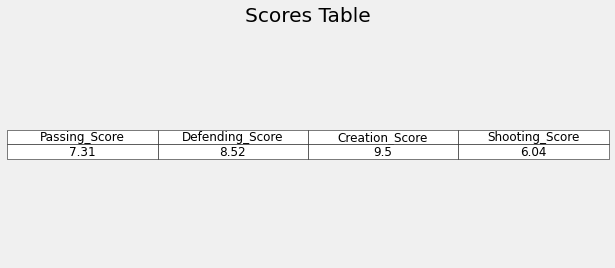

In [345]:
sim_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores]
sim_player[metric_scores] = \
    sim_player[metric_scores].round(2)

fig, ax = plt.subplots(figsize=(8, 4))


ax.axis('off')  # Hide the axes
tbl = ax.table(cellText=sim_player.values, colLabels=sim_player.columns, loc='center', cellLoc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)  # Adjust the table size if needed

plt.title('Scores Table')
plt.show()

In [ ]:
# write up needed 